In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

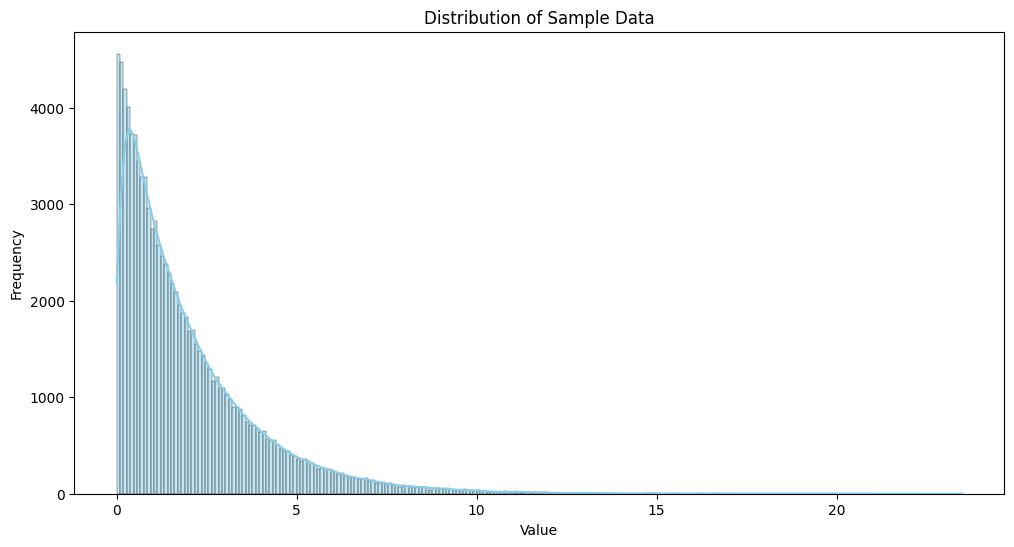

In [39]:
# 표본 데이터 생성
np.random.seed(42)
sample_data = np.random.exponential(scale=2, size=100000)

# 표본 데이터 시각화
plt.figure(figsize=(12, 6))
sns.histplot(sample_data, kde=True, color='skyblue')
plt.title('Distribution of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [40]:
# 표본 평균과 표준편차 계산
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data)

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")

Sample Mean: 1.9919
Sample Standard Deviation: 1.9859


In [41]:
# 이론적 분포 (중심극한정리에 따른 정규분포)
x = np.linspace(sample_mean - 4*sample_std/np.sqrt(len(sample_data)), 
                sample_mean + 4*sample_std/np.sqrt(len(sample_data)), 100)
theoretical_dist = stats.norm.pdf(x, loc=sample_mean, scale=sample_std/np.sqrt(len(sample_data)))

In [46]:
# 부트스트랩 분포 생성
n_bootstrap = 10000
n_samples_to_show = 10
bootstrap_means = []
bootstrap_samples_to_show = []
for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    if i < n_samples_to_show:
        bootstrap_samples_to_show.append(bootstrap_sample)
    bootstrap_means.append(np.mean(bootstrap_sample))

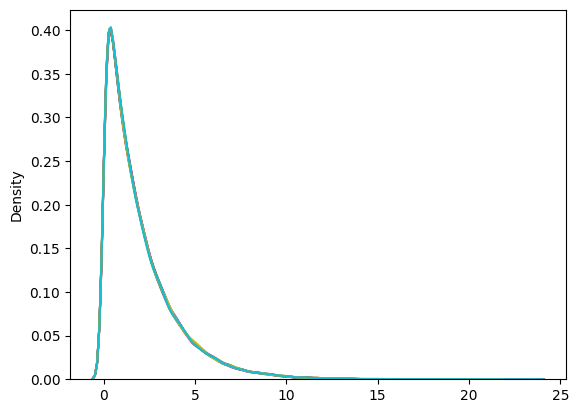

In [47]:
# 선택된 부트스트랩 샘플들의 분포
colors = plt.cm.tab10(np.linspace(0, 1, n_samples_to_show))
for i, bootstrap_samples in enumerate(bootstrap_samples_to_show):
    sns.kdeplot(bootstrap_samples, color=colors[i], label=f'Bootstrap Sample {i+1}')

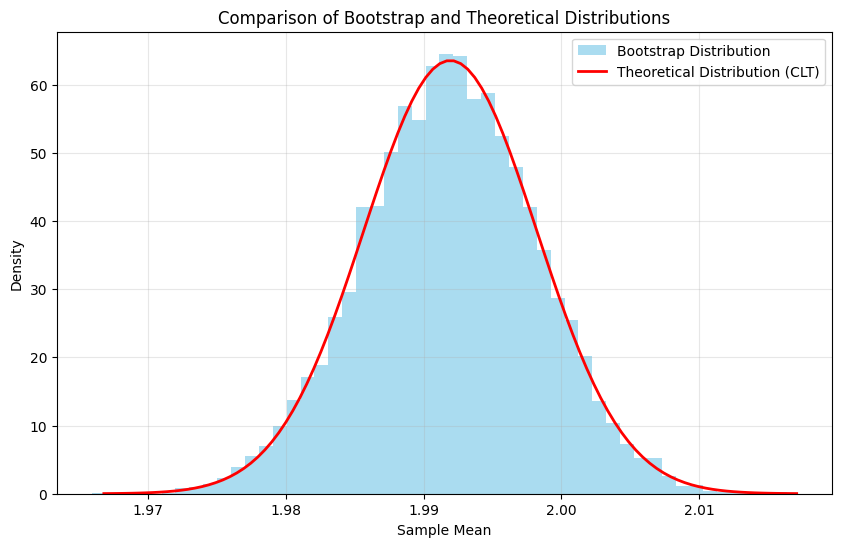

In [48]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='skyblue', label='Bootstrap Distribution')
plt.plot(x, theoretical_dist, 'r-', lw=2, label='Theoretical Distribution (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Comparison of Bootstrap and Theoretical Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
# 통계량 출력
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")
print(f"Bootstrap Mean: {np.mean(bootstrap_means):.4f}")
print(f"Bootstrap Standard Deviation: {np.std(bootstrap_means):.4f}")
print(f"Theoretical Standard Error: {sample_std/np.sqrt(len(sample_data)):.4f}")

Sample Mean: 1.9919
Sample Standard Deviation: 1.9859
Bootstrap Mean: 1.9919
Bootstrap Standard Deviation: 0.0063
Theoretical Standard Error: 0.0063
